In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_data(year):
    return pd.read_csv('Data/AQI/aqi{}.csv'.format(year), chunksize=24)

In [3]:
def avg_data(year):
    temp_i = 0
    average = []
    data_year = read_data(year)
    for rows in data_year:
        add_var=0
        avg=0.0
        data=[]
        df = pd.DataFrame(data=rows)
        for index, row in df.iterrows():
            data.append(row['PM2.5'])
        for i in data:
            if type(i) is float or type(i) is int:
                add_var = add_var+i
            elif type(i) is str:
                if i!='NoData' and i!='PwrFail' and i!='---' and i!='InVld':
                    temp = float(i)
                    add_var = add_var+temp
        avg = add_var/24
        temp_i = temp_i+1
        
        average.append(avg)
    return average

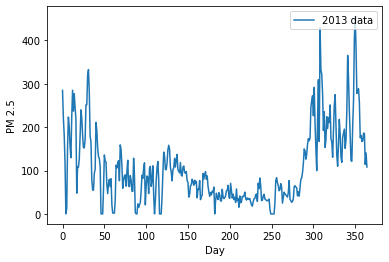

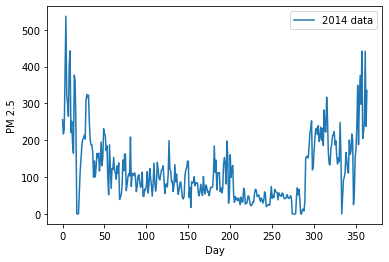

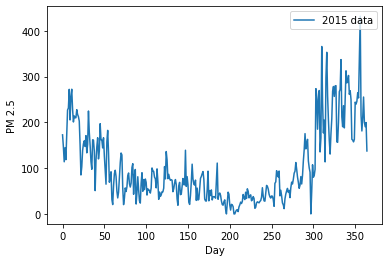

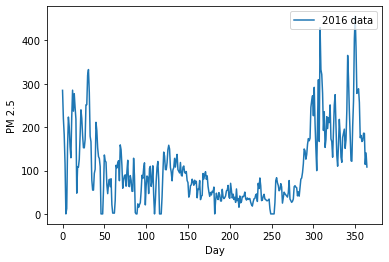

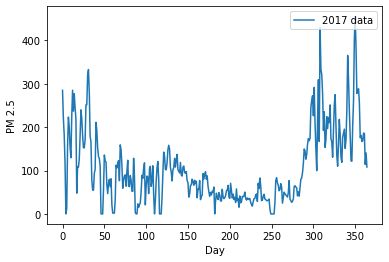

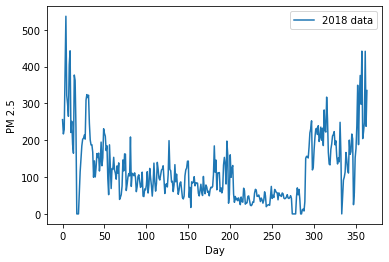

In [5]:
if __name__ == "__main__":    
    for i in range(2013, 2019):
        lsti = avg_data(i)
        plt.plot(range(0,len(lsti)),lsti,label="{} data".format(i))
        plt.xlabel('Day')
        plt.ylabel('PM 2.5')
        plt.legend(loc='upper right')
        plt.show()
